In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']), sep=';')
df

Saving winequality-red.csv to winequality-red (1).csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


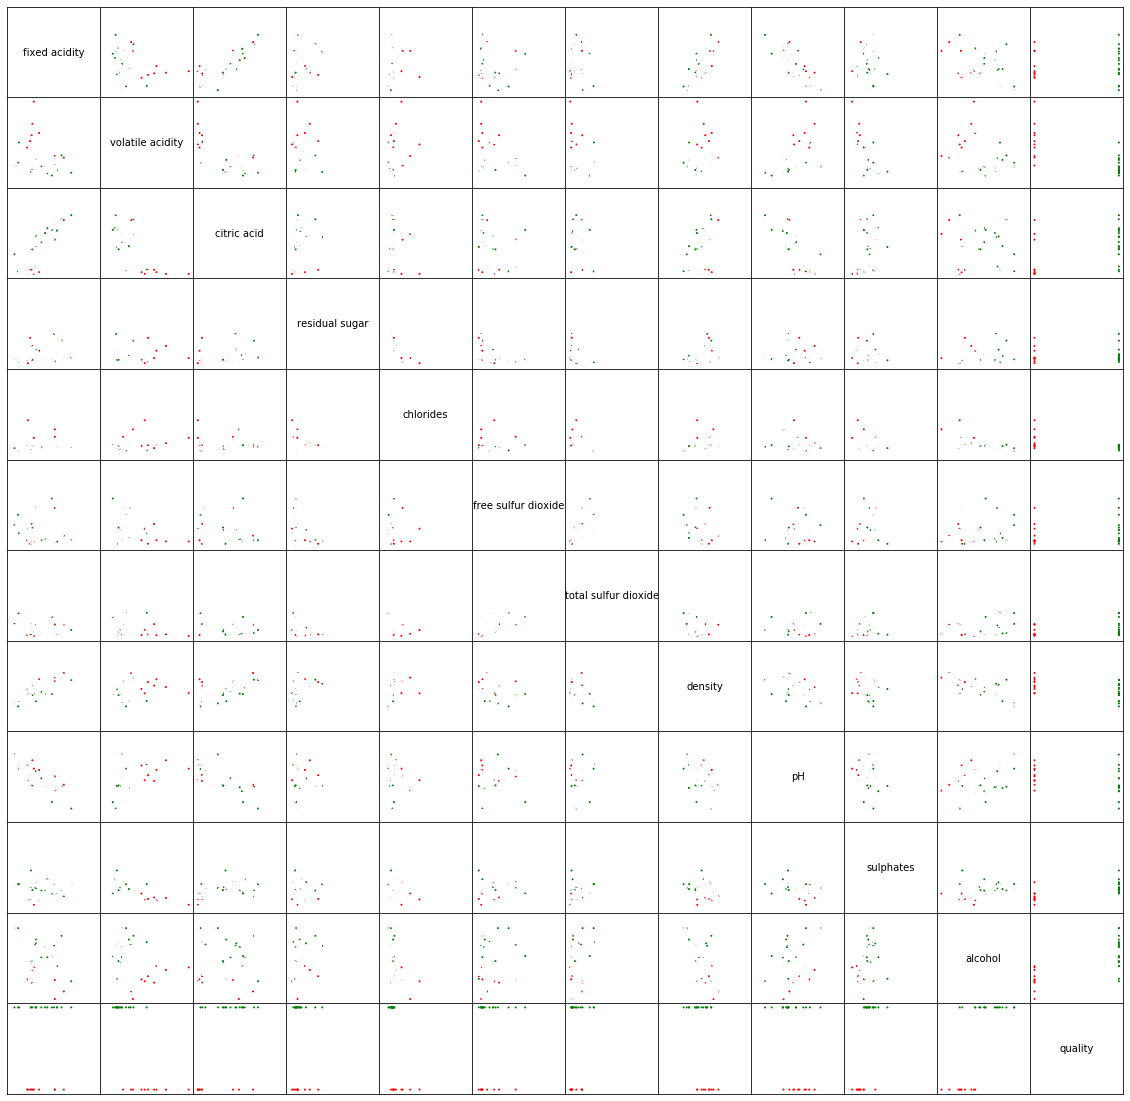

<Figure size 432x288 with 0 Axes>

In [41]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
  numvars, numdata = wine_data.shape

  fig, axes = plt.subplots(nrows=numdata, ncols=numdata, figsize=(20, 20))
  fig.subplots_adjust(hspace=0, wspace=0)

  for ax in axes.flat:
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

  color_func = lambda x: 'green' if x == good_threshold else ('red' if x == bad_threshold else 'white')
  colors = [color_func(wine_data.iloc[x, 11]) for x in range(numvars)];

  for i in range(numdata):
    for j in range(numdata):
      if (i != j):
          axes[i, j].scatter(wine_data.iloc[:, j], wine_data.iloc[:, i], s=1, c=colors)

  names = list(wine_data.columns)
  for i, label in enumerate(names):
    axes[i,i].annotate(label, (0.5, 0.5), ha='center', va='center')

  plt.show()

  for ax in axes.flat:
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)
    
  if save_plot:
    plt.savefig('plot_scatter_matrix.png')

plot_scatter_matrix(df, 8, 3, True)